In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
os.chdir("../")

In [2]:
import json

import logging

logger = logging.getLogger("pyclaw")
logger.setLevel(logging.CRITICAL)

import matplotlib.pyplot as plt
import numpy as np
import cupy as cp

In [3]:
import kipack.collision as coll
import kipack.collision.linear as L

config = coll.utils.CollisionConfig.from_json("./configs/rbm_linear.json")
# vmesh = L.VMesh(config)

In [4]:
from rbm_0d import run
dt = 0.001
nt = 500
tfinal = dt * nt
macro_frames, sol_frames, dv = run(dt=dt, nt=nt, eps=(0.2, 2), coll="fsm", scheme="Euler")

2 dimensional collision model.
Number of velocity cells: 64.
Velocity domain: [-7.724873734152916, 7.724873734152916].
e: 1
Finished collision model precomputation.
500/500 [==============================] - 5s 9ms/step


In [5]:
rho, u, T = zip(*macro_frames)
sols, err = zip(*sol_frames)

Text(0.5, 0.98, 'FSM macros')

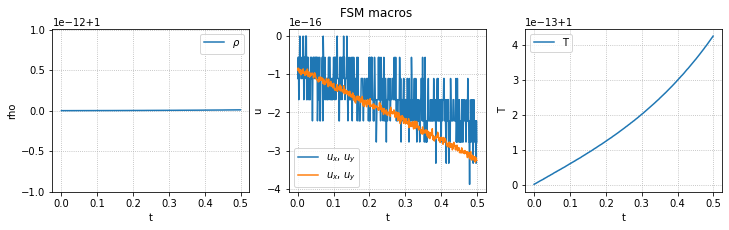

In [6]:
t_idx = -1

t = np.arange(0, tfinal, dt)
fig, axes = plt.subplots(1, 3, figsize=(12,3))

axes[0].plot(t, rho, label=r"$\rho$")
axes[1].plot(t, u, label=r"$u_x$, $u_y$")
axes[2].plot(t, T, label=r"T")

for ax, y in zip(axes, ["rho", "u", "T"]):
    ax.set_xlabel("t")
    ax.set_ylabel(y)
    ax.legend()
    ax.grid(which='both',linestyle=':')

fig.suptitle("FSM macros")
# fig.savefig("../figs/fsm_macros.pdf")

Text(0.5, 0.98, 'FSM error')

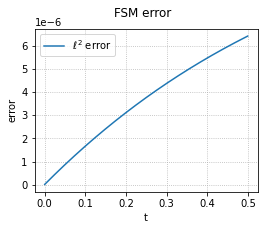

In [9]:
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(t, err, label=r"$\ell^2$ error")
ax.set_xlabel("t")
ax.set_ylabel("error")
ax.legend()
ax.grid(which='both',linestyle=':')

fig.suptitle("FSM error")
# fig.savefig("../figs/fsm_err.pdf")

Text(0.5, 0.98, 'FSM solution at $t_{final}=1$')

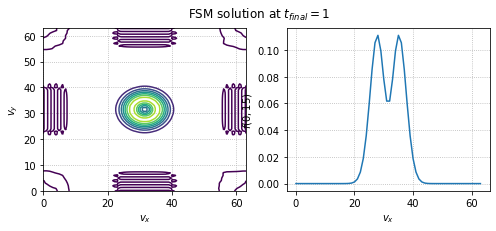

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].contour(sols[-1].q)
ax[0].set_xlabel(r"$v_x$")
ax[0].set_ylabel(r"$v_y$")
ax[0].grid(which='both',linestyle=':')

ax[1].plot(sols[-1].q[:, 30])
ax[1].set_xlabel(r"$v_x$")
ax[1].set_ylabel(r"$f(0, 15)$")
ax[1].grid(which='both',linestyle=':')

fig.suptitle("FSM solution at $t_{final}=1$")
# fig.savefig("../figs/fsm_sol.pdf")